## **Indian Start-up Investment Analysis (2018 - 2021)**

#### **General Objective:**
To assess the investment potential and attractiveness of the Indian startup ecosystem and provide recommendations for optimal course of action

#### **Business Questions:**
1.  Analyze the growth trajectory of startups over the past four years from 2018 to 2021. Investigate if there is an increase in the number of startups being funded and the average size companies of funded annually.
2. Investigate the financial landscape for Indian startups over the four years. Has the average funding amount increased, indicating growing investor confidence, or has it plateaued or decreased overtime? 
3. Explore which stages of startups (e.g., Seed, Series A, Series B) are receiving the majority of investments. What are the predominant stages funded, and which cities are the identified stages of business situated.
4. To identify what locations within India have emergedas the primary hubs for Startup activity and investment, and what factors contribute to their perfomance 
5. To Identify sectors that have shown the highest growth over the four years


### **Hypothesis to Test:**
 
**Null Hypothesis (H0):**
There is no significant difference in the average funding amounts received across different sectors within the Indian startup ecosystem from 2018 to 2021.

**Alternative Hypothesis (H1):**
There is a significant difference in the average funding amounts received across different sectors within the Indian startup ecosystem from 2018 to 2021.

In [244]:
# import relevant packages
import pyodbc    
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster
 
warnings.filterwarnings('ignore')

In [185]:
# load environment variables from .env file into a dictionary
environment_variables = dotenv_values(r"C:\Users\hp\Desktop\CAREER ACC 1\LP1-2\.env")
 
# Get the values for the credentials from .env file
database=environment_variables.get("DATABASE")
server=environment_variables.get("SERVER")
username=environment_variables.get("USERNAME")
password=environment_variables.get("PASSWORD")
 
# create a connection string
connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [186]:
connection = pyodbc.connect(connection_string)

In [187]:
# selecting tables from DB
db_query = ''' SELECT *
            FROM INFORMATION_SCHEMA.TABLES
            WHERE TABLE_TYPE = 'BASE TABLE' '''

In [188]:
#call selected tables from database
ata =pd.read_sql(db_query, connection)
ata

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,LP1_startup_funding2021,BASE TABLE
1,dapDB,dbo,LP1_startup_funding2020,BASE TABLE


In [189]:
#call tables to their own dataframe
query_01 = "SELECT * FROM dbo.LP1_startup_funding2020"
data_2020 = pd.read_sql(query_01, connection)
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [190]:
#table 2
query_02 = "SELECT * FROM dbo.LP1_startup_funding2021"
data_2021 = pd.read_sql(query_02, connection)
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [191]:
print(data_2021.columns)

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')


In [192]:
#loading the csv data for the 2019 startups
data_2019 = pd.read_csv(r'C:\Users\hp\Desktop\CAREER ACC 1\LP1-2\csv files\startup_funding2019.csv')
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [193]:
#renaming the column names to math 2020 and 2021 df's to enable merging
data_2019.columns = ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage']
data_2019.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [194]:
#loading the 2018 data
data_2018 = pd.read_csv(r'C:\Users\hp\Desktop\CAREER ACC 1\LP1-2\csv files\startup_funding2018.csv')
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [195]:
print(data_2018.columns)

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')


In [196]:
data_2018.columns = ['Company_Brand', 'Sector', 'Stage', 'Amount', 'HeadQuarter', 'What_it_does']
data_2018.head()

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [197]:
#adding a new column to the new dataframes to indicate the year
data_2018['year_founded'] = 2018
data_2019['year_founded'] = 2019
data_2020['year_founded'] = 2020
data_2021['year_founded'] = 2021


In [198]:
#checking results
data_2019.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year_founded
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


In [199]:
#merging the dataframes
merged_data = pd.concat([data_2018, data_2019, data_2020, data_2021], axis = 0)
print(merged_data.columns)


Index(['Company_Brand', 'Sector', 'Stage', 'Amount', 'HeadQuarter',
       'What_it_does', 'year_founded', 'Founded', 'Founders', 'Investor',
       'column10'],
      dtype='object')


In [200]:
merged_data.head()

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does,year_founded,Founded,Founders,Investor,column10
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN,NaN


# Cleaning the columns


In [201]:
#checking columns
print(merged_data.columns)

Index(['Company_Brand', 'Sector', 'Stage', 'Amount', 'HeadQuarter',
       'What_it_does', 'year_founded', 'Founded', 'Founders', 'Investor',
       'column10'],
      dtype='object')


In [202]:
# Check data structure and information
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2879 entries, 0 to 1208
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2879 non-null   object 
 1   Sector         2861 non-null   object 
 2   Stage          1941 non-null   object 
 3   Amount         2622 non-null   object 
 4   HeadQuarter    2765 non-null   object 
 5   What_it_does   2879 non-null   object 
 6   year_founded   2879 non-null   int64  
 7   Founded        2110 non-null   float64
 8   Founders       2334 non-null   object 
 9   Investor       2253 non-null   object 
 10  column10       2 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 269.9+ KB


In [203]:
#column 10 is basically empty so we drop it
merged_data.drop(columns=['column10'], inplace=True)

### The Company brand column

In [204]:
#checking percentage of null values
null_counts = merged_data['Company_Brand'].isnull().sum()
total_rows = len(merged_data['Company_Brand'])
null_percentage = (null_counts / total_rows) * 100
print (null_percentage)


0.0


##### The company brand column has no null values 


### The Sector column


In [205]:
# Get all unique values in the 'sector' column along with their indexes
unique_sectors = merged_data['Sector'].unique()

print (unique_sectors)

['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing'
 'Agriculture, Farming' 'Credit, Financial Services, Lending, Marketplace'
 'Financial Services, FinTech' 'E-Commerce Platforms, Retail, SaaS'
 'Cloud Infrastructure, PaaS, SaaS' 'Internet, Leisure, Marketplace'
 'Market Research' 'Information Services, Information Technology'
 'Mobile Payments' 'B2B, Shoes' 'Internet'
 'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat'
 'Food Delivery' 'Industrial Automation'
 'Automotive, Search Engine, Service Industry' 'Finance, Internet, Travel'
 'Accounting, Business Information Systems, Business Travel, Finance, SaaS'
 'Artificial Intelligence, Product Search, SaaS, Service Industry, Software'
 'Internet of Things, Waste Management'
 'Air Transportation, Freight Service, Logistics, Marine Transportation'
 'Financial Services' 'Food and Beverage' 'Autonomous Vehicles'
 'Enterprise Software, Health Care, Hospital, Parenting

##### some the sector names in the sector table were of the same category but were in upper case or lower case letters thus appearing as unique. Sector mapping is used to correct tyhis

In [206]:
# Mapping dictionary for sector cleaning
sector_mapping = {
    'FinTech': ['FinTech', 'fintech', 'Financial Technology', 'Fintech'],
    'EdTech': ['EdTech', 'Edtech', 'Education Technology'],
    'E-commerce': ['E-commerce', 'Ecommerce', 'ecommerce', 'e-commerce'],
    'AI': ['AI', 'Artificial Intelligence', 'artificial intelligence'],
    'Health': ['Health', 'healthcare', 'Health Care', 'healthtech', 'Healthcare'],
    'Food & Beverage': ['Food & Beverage', 'Foodtech', 'Food and Beverages', 'Food Industry', 'Food devlivery', ' Food Delivery' 'Food & tech', 'Foodtech & Logistics', 'Food & Nutrition', 'Food & Bevarages'],
    'Automotive': ['Automotive', 'Automobile', 'Automobiles', 'Automobile Technology', 'automotive tech'],
    'Logistics': ['Logistics', 'logistics', 'Transport & Rentals', 'Transport', 'Logitech', 'Transportation', 'logistics & Supply Chain'],
    'Fashion': ['Fashion', 'Fashion startup', 'Fashion Tech', 'Fashion and lifestyle', 'Fashion & Lifestyle', 'Fashion & Lifestyle', 'Fashion & Lifestyle', 'Fashion & Lifestyle', 'Fashion & Lifestyle', 'FMCG', 'Fashion & Lifestyle', 'Fashion & Lifestyle', 'fashion and lifestyle', 'fashion & lifestyle', 'Fashion & Lifestyle'],
    'CleanTech': ['CleanTech', 'Cleantech', 'Renewables & Environment', 'Clean Energy', 'Pollution control equiptment', 'Renewable player', 'Clean energy', 'Renewable Energy'],
    'Real Estate': ['Real Estate', 'Real estate', 'Commercial Real Estate', 'Housing', 'Housing Marketplace', 'Housing & Rentals', 'housing & Rentals'],
    'Tech': ['Tech', 'technology', 'Technology', 'Techonology', 'Tech company', 'tech startup', 'IT', 'IT company'],
    'SaaS': ['SaaS', 'Saas', 'SaaS startup', 'SaaS platform'],
    'Retail': ['Retail', 'Retail Tech', 'Retail startup', 'Retail Aggregator'],
    'Marketing': ['Marketing', 'marketing', 'Marketing company', 'Marketing & Customer loyalty', 'MarTech'],
    'Blockchain': ['Blockchain', 'Cryptocurrency', 'blockchain'],
    'Social Media': ['Social Media', 'Social network', 'social media', 'Social e-commerce', 'Social Network'],
    'Entertainment': ['Entertainment', 'Digital Entertainment', 'media', 'Media', 'Online Media', 'Media Tech'],
    'Travel': ['Travel', 'TravelTech', 'Tourism', 'Tourism & EV', 'Travel tech'],
    'Finance': ['Finance', 'Financial Services', 'Finance company', 'Financial Technology', 'financial services', 'Financial Exchanges', 'financial technology', 'Venture capitalist', 'Venture capital', 'Venture Capital', 'Capital Markets', 'Investment Management', 'Investment', 'investment', 'Investment Banking', 'investment Management', 'Investment', 'Impact Investing', 'impact investing', 'FinTech & Financial Services', 'FinTech'],
    'E-learning': ['E-learning', 'E-Learning', 'EdtTech', 'EdTech', 'EdTech Startup', 'Education', 'education', 'Higher Education', 'continuing education', 'Education Management', 'Education Technology', 'Educational'],
    'AI & Tech': ['AI & Tech', 'AI and tech'],
    'Security': ['Security', 'Cybersecurity', 'Network Security'],
    'Insurance': ['Insurance', 'Insurance technology', 'insurtech', 'Insurance Tech', 'Health Insurance', 'Life Insurance', 'Property Insurance', 'insurance tech'],
    'HR': ['HR', 'HR Tech', 'HRTech', 'Human Resources', 'hrtech'],
    'Beauty': ['Beauty', 'beauty', 'Beauty & wellness', 'Beauty & Personal Care', 'Beauty & Personal Care'],
    'Agriculture': ['Agriculture', 'AgriTech', 'Agri tech', 'Agri tech', 'Agri tech', 'Agri tech', 'Agriculture Tech', 'AgriTech', 'AgTech', 'Agri tech'],
    'Energy': ['Energy', 'Solar', 'Clean Energy', 'Energy Storage', 'Solar solution', 'Renewable Energy', 'Energy Management', 'Energy', 'Natural Resources', 'electricity', 'Solar Monitoring Company', 'solar', 'Renewable Energy', 'solar'],
    'Mobility': ['Mobility', 'MoEVing', 'Mobility tech', 'Mobility/Transport', 'Mobility & Transport', 'Mobility & Technology', 'Mobility Services', 'Mobility', 'Mobility & EV', 'Mobility & EV', 'Mobility & EV', 'Mobility', 'Mobility', 'Mobility & Tech', 'Mobility'],
    'Manufacturing': ['Manufacturing', 'Manufacturing startup', 'Manufacturing startup', 'manufacturing', 'Manufacturing startup'],
    'D2C': ['D2C', 'D2C Business', 'D2C Fashion', 'D2C jewellery'],
    'Data Science': ['Data Science', 'Data Analytics', 'data science', 'data analytics'],
    'Telecommunications': ['Telecommunications', 'Telecommunication'],
    'Pharmaceutical': ['Pharmaceutical', 'pharmaceutical']
}

# Function to map sector values
def map_sector(Sector):
    for key, values in sector_mapping.items():
        if Sector in values:
            return key
    return Sector  # Return original value if not found

# Apply mapping function to 'sector' column
merged_data['Sector'] = merged_data['Sector'].apply(map_sector)

### The stage column

In [207]:
# Print the unique values
unique_stages = merged_data['Stage'].unique()
print(unique_stages)

['Seed' 'Series A' 'Angel' 'Series B' 'Pre-Seed' 'Private Equity'
 'Venture - Series Unknown' 'Grant' 'Debt Financing' 'Post-IPO Debt'
 'Series H' 'Series C' 'Series E' 'Corporate Round' 'Undisclosed'
 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593'
 'Series D' 'Secondary Market' 'Post-IPO Equity' 'Non-equity Assistance'
 'Funding Round' nan 'Fresh funding' 'Pre series A' 'Series G'
 'Post series A' 'Seed funding' 'Seed fund' 'Series F' 'Series B+'
 'Seed round' 'Pre-series A' None 'Pre-seed' 'Pre-series' 'Debt'
 'Pre-series C' 'Pre-series B' 'Bridge' 'Series B2' 'Pre- series A' 'Edge'
 'Pre-Series B' 'Seed A' 'Series A-1' 'Seed Funding' 'Pre-seed Round'
 'Seed Round & Series A' 'Pre Series A' 'Pre seed Round' 'Angel Round'
 'Pre series A1' 'Series E2' 'Seed Round' 'Bridge Round' 'Pre seed round'
 'Pre series B' 'Pre series C' 'Seed Investment' 'Series D1' 'Mid series'
 'Series C, D' '$1200000' 'Seed+' 'Series F2' 'Series A+' 'S

In [208]:
# Define the mapping dictionary
stage_mapping = {
    'Pre-Series A': ['Pre-Series A', 'Pre Series A', 'Pre series A1', 'Series A2'],
    'Pre-Series B': ['Pre-Series B', 'Pre Series B'],
    'Series B': ['Series B', 'Series B3', 'Series B+', 'Series B2', 'Venture - Series Unknown', 'Debt'],
    'Series A': ['Series A+', 'Series A-1', 'Series A', 'Seed Round & Series A', 'Pre-series A1'],
    'Series F': ['Series F', 'Series F2', 'Series F1'],
    'Seed': ['Seed Investment', 'Seed Funding', 'Seed funding', 'Seed+', 'Pre-seed Round'],
    'Series E': ['Series E', 'Series E2', 'Series E'],
    'Pre-Series C': ['Pre-Series C', 'Pre Series C'],
    'Series C' : ['Series C, D'],
    'Series D': ['Series D1']
}

# Invert the mapping dictionary to map individual variations to their standard stage names
inverted_mapping = {v: k for k, values in stage_mapping.items() for v in values}

# Apply the mapping to the 'stage' column permanently
merged_data['Stage'] = merged_data['Stage'].replace(inverted_mapping)

# Display the updated DataFrame to verify the changes
print(merged_data['Stage'].unique())

['Seed' 'Series A' 'Angel' 'Series B' 'Pre-Seed' 'Private Equity' 'Grant'
 'Debt Financing' 'Post-IPO Debt' 'Series H' 'Series C' 'Series E'
 'Corporate Round' 'Undisclosed'
 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593'
 'Series D' 'Secondary Market' 'Post-IPO Equity' 'Non-equity Assistance'
 'Funding Round' nan 'Fresh funding' 'Pre series A' 'Series G'
 'Post series A' 'Seed fund' 'Series F' 'Seed round' 'Pre-series A' None
 'Pre-seed' 'Pre-series' 'Pre-series C' 'Pre-series B' 'Bridge'
 'Pre- series A' 'Edge' 'Pre-Series B' 'Seed A' 'Pre-Series A'
 'Pre seed Round' 'Angel Round' 'Seed Round' 'Bridge Round'
 'Pre seed round' 'Pre series B' 'Pre series C' 'Mid series' '$1200000'
 'PE' '$300000' 'Early seed' '$6000000' '$1000000' 'Seies A' 'Series I']


In [209]:
# Replace specified values with np.nan in the 'stage' column
values_to_replace = [
    'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
    '$1200000',
    'PE',
    'Bridge',
    '$300000',
    '$1000000',
    '$6000000',
    '$1200000'


]

# Apply the replacement permanently
merged_data['Stage'].replace(values_to_replace, np.nan, inplace=True)

### The Amount column


In [210]:
'''All unique values in amount column was printed to detect characteristics of the values below'''

# Additional characteristics to count
characteristics = ['—', '\$', '\$Undisclosed', 'Undisclosed', 'None', 'nan', 'Series C', 'Seed', 'Pre-series A', '₹']

# Initialize counts dictionary
counts = {char: 0 for char in characteristics}

# Count occurrences of each characteristic
for characteristic in characteristics:
    if characteristic in {'—', '\$', '\$Undisclosed', 'Undisclosed', 'None', 'nan', 'Series C', 'Seed', 'Pre-series A', '₹'}:
        count = merged_data['Amount'].astype(str).str.contains(characteristic, regex=True, na=False).sum()
    else:
        count = merged_data['Amount'].astype(str).str.contains(f"\\b{characteristic}\\b", regex=True, na=False).sum()
    counts[characteristic] = count

# Count occurrences of numeric values
numeric_count = merged_data['Amount'].notnull().sum()

# Print counts
for characteristic, count in counts.items():
    print(f'{characteristic} - {count}')
print(f'Numeric values - {numeric_count}')

— - 148
\$ - 1289
\$Undisclosed - 73
Undisclosed - 128
None - 3
nan - 254
Series C - 2
Seed - 2
Pre-series A - 1
₹ - 144
Numeric values - 2622


In [211]:
# Specify the stages to search for
stages_to_search = ['Series C', 'Seed', 'Pre-series A']

# Filter the DataFrame for rows containing the specified stages in funding_amount
filtered_data = merged_data[merged_data['Amount'].isin(stages_to_search)]

# Print column names
print('Index', 'Funding Amount', 'Stage')

# Print index, funding_amount, and corresponding stage side by side
for index, row in filtered_data.iterrows():
    print(f'{index}, {row["Amount"]}, {row["Stage"]}')

Index Funding Amount Stage
242, Series C, None
256, Series C, None
257, Seed, None
545, Pre-series A, None
1148, Seed, None


In [212]:
# Reset index to avoid duplicate labels
merged_data.reset_index(drop=True, inplace=True)

# Specify the stages to search for
stages_to_search = ['Series C', 'Seed', 'Pre-series A']

# Replace values in 'Stage' column where 'Amount' matches the specified stages
merged_data.loc[merged_data['Amount'].isin(stages_to_search), 'Stage'] = merged_data['Amount']

# Replace values in 'Amount' column with NaN where it matches the specified stages
merged_data.loc[merged_data['Amount'].isin(stages_to_search), 'Amount'] = float('nan')

In [213]:
# Specify the indexes to verify
indexes_to_verify = [242, 256, 247, 1148]

# Filter the DataFrame for the specified indexes
filtered_data = merged_data.loc[indexes_to_verify]

# Print index, funding_amount, and stage side by side for verification
print("Index, Amount, Stage")
for index, row in filtered_data.iterrows():
    print(f'{index}, {row["Amount"]}, {row["Stage"]}')

Index, Amount, Stage
242, ₹103,000,000, Seed
256, 1450000, Seed
247, 2000000, Seed
1148, 2500000.0, Pre-Series A


In [214]:

# Define the exchange rate
exchange_rate = 0.0140

# Replace '—' in funding_amount with np.nan
merged_data['Amount'].replace('—', np.nan, inplace=True)

# Replace 'None' with np.nan
merged_data['Amount'].replace('None', np.nan, inplace=True)

# Convert funding_amount to string type
merged_data['Amount'] = merged_data['Amount'].astype(str)

# Remove dollar symbol and commas, then convert to float
merged_data['Amount'] = merged_data['Amount'].str.replace('$', '', regex=False)
merged_data['Amount'] = merged_data['Amount'].str.replace(',', '', regex=False)

# Convert Rupee values to USD and remove the rupee symbol
merged_data['Amount'] = merged_data['Amount'].apply(
    lambda x: float(x.replace('₹', '')) * exchange_rate if isinstance(x, str) and '₹' in x else x
)

# Convert funding_amount to float type
merged_data['Amount'] = pd.to_numeric(merged_data['Amount'], errors='coerce')

In [215]:
merged_data['Amount']

0         250000.0
1         560000.0
2         910000.0
3        2000000.0
4              NaN
           ...    
2874     3000000.0
2875    20000000.0
2876    55000000.0
2877    26000000.0
2878     8000000.0
Name: Amount, Length: 2879, dtype: float64

### The location column

In [216]:
merged_data['HeadQuarter']

0            Bangalore, Karnataka, India
1             Mumbai, Maharashtra, India
2                Gurgaon, Haryana, India
3            Noida, Uttar Pradesh, India
4       Hyderabad, Andhra Pradesh, India
                      ...               
2874                            Gurugram
2875                           New Delhi
2876                           Bangalore
2877                            Gurugram
2878                           Bangalore
Name: HeadQuarter, Length: 2879, dtype: object

In [217]:
#we want to remain with juat the name of the city
merged_data['HeadQuarter'] = merged_data['HeadQuarter'].str.split(',').str[0]


In [218]:
merged_data['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow', nan,
       'Telangana', 'Gurugram', 'Surat', 'Uttar pradesh', 'Rajasthan',
       'Tirunelveli', None, 'Singapore', 'Gujarat', 'Kerala', 'Frisco',
       'California', 'Dhingsara', 'New York', 'Patna', 'San Francisco',
       'San Ramon', 'Paris', 'Plano', 'Sydney', 'San Francisco Bay Area',
       'Bangaldesh', 'London', 'Milano', 'Palmwoods', 'France',
       'Samastipur', 

In [219]:
# Dictionary to map incorrect city names to correct ones
corrections = {
    'Bengaluru': 'Bangalore',
    'Kormangala': 'Koramangala',
    'Gurugram': 'Gurgaon',
    'Banglore': 'Bangalore',
    'Ahmadabad': 'Ahmedabad',
    'Hyderebad': 'Hyderabad',
    'Odisha': 'Bhubaneswar',
    'Orissia': 'Bhubaneswar',
    'Telugana': 'Hyderabad',
    'Rajastan': 'Rajasthan',
    'Uttar pradesh': 'Uttar Pradesh',
    'Small Towns': None,  # Remove 'Small Towns' from the list
    'Online Media\t#REF!': None,  # Remove 'Online Media\t#REF!' from the list
    'Pharmaceuticals\t#REF!': None,  # Remove 'Pharmaceuticals\t#REF!' from the list
    'Gurugram\t#REF!': 'Gurugam',# Remove 'Gurugram\t#REF!' from the list
    'Information Technology & Services' : None,# Remove 'Information Technology & Services' from the list


    
}

# Map incorrect city names to correct ones
merged_data['HeadQuarter'] = merged_data['HeadQuarter'].replace(corrections)

In [220]:
merged_data['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad', 'Kalkaji',
       'Delhi', 'India', 'Hubli', 'New Delhi', 'Chennai', 'Mohali',
       'Kolkata', 'Pune', 'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur',
       'Haryana', 'Cochin', 'Faridabad', 'Jaipur', 'Kota', 'Anand',
       'Bangalore City', 'Belgaum', 'Thane', 'Margão', 'Indore', 'Alwar',
       'Kannur', 'Trivandrum', 'Ernakulam', 'Koramangala',
       'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad', 'Kochi',
       'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore', 'Worli',
       'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow', nan, 'Telangana',
       'Surat', 'Rajasthan', 'Tirunelveli', None, 'Singapore', 'Gujarat',
       'Kerala', 'Frisco', 'California', 'Dhingsara', 'New York', 'Patna',
       'San Francisco', 'San Ramon', 'Paris', 'Plano', 'Sydney',
       'San Francisco Bay Area', 'Bangaldesh', 'London', 'Milano',
       'Palmwoods', 'France', 'Samastipur', 'Irvine', 'Tumkur',
       'Newcastle Upon Tyne'

### Investor Column

In [221]:
# Print unique values in the 'Investor' column
unique_investors = merged_data['Investor'].unique()
print(unique_investors)

[nan 'Sixth Sense Ventures' 'General Atlantic' ... 'Owl Ventures'
 'Winter Capital, ETS, Man Capital' '3one4 Capital, Kalaari Capital']


In [222]:
# Define the values to drop
values_to_drop = [
    '1000000', '#REF!', '$Undisclosed', '2000000', '$1000000', '$22000000', '$5000000', 'http://100x.vc/'
]

# Replace specified values with NaN in the 'Investor' column
merged_data['Investor'] = merged_data['Investor'].replace(values_to_drop, pd.NA)

In [223]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2879 non-null   object 
 1   Sector         2861 non-null   object 
 2   Stage          1930 non-null   object 
 3   Amount         2312 non-null   float64
 4   HeadQuarter    2760 non-null   object 
 5   What_it_does   2879 non-null   object 
 6   year_founded   2879 non-null   int64  
 7   Founded        2110 non-null   float64
 8   Founders       2334 non-null   object 
 9   Investor       2246 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 225.1+ KB


In [224]:
# Drop duplicate rows from merged_data
merged_data.drop_duplicates(inplace=True)

# Verify if duplicates are dropped
print("Number of duplicate rows after dropping:", merged_data.duplicated().sum())

Number of duplicate rows after dropping: 0


In [225]:
# Calculate the mode for each sector in the 'investor' column
mode_per_sector = merged_data.groupby('Sector')['Investor'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown")


# Fill missing values in the 'investor' column with the calculated mode per sector
merged_data['Investor'].fillna(mode_per_sector, inplace=True)

In [226]:
#missing value
merged_data.isna().sum()

Company_Brand      0
Sector            18
Stage            940
Amount           563
HeadQuarter      118
What_it_does       0
year_founded       0
Founded          768
Founders         544
Investor           0
dtype: int64

In [227]:
'''Drop column irrelevant to analytical question'''

# Drop the "Founded" and "Founders" columns from merged_data
merged_data.drop(columns=['Founded', 'Founders'], inplace=True)

In [228]:
#sector has very few null values so we just drop them
merged_data.dropna(subset=['Sector'], inplace=True)

In [180]:
#filling the headquarter and amount and stage and investor column null values with undisclosed
merged_data['HeadQuarter'].fillna('undisclosed', inplace=True)
merged_data['Amount'].fillna('undisclosed', inplace=True)
merged_data['Stage'].fillna('undisclosed', inplace=True)


In [173]:
merged_data.isna().sum()

Company_Brand    0
Sector           0
Stage            0
Amount           0
HeadQuarter      0
What_it_does     0
year_founded     0
Investor         0
dtype: int64

In [250]:
merged_data['Amount'].fillna(0, inplace = True)

In [174]:
# Convert 'year_founded' column to datetime format
merged_data['year_founded'] = pd.to_datetime(merged_data['year_founded'])

# Extract only the year
merged_data['year_founded'] = merged_data['year_founded'].dt.year

In [251]:
merged_data.to_csv('cleaned_data.csv', index = False)

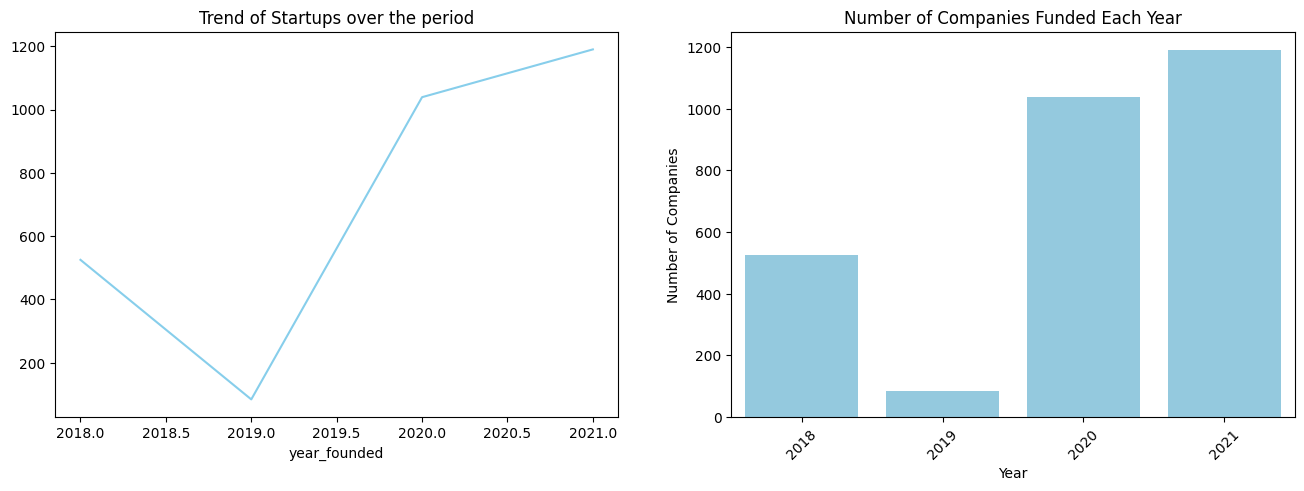

In [229]:


neutral_color = 'skyblue'  # Change to a neutral color
plt.figure(figsize=(16, 5))

# Plotting the line graph
plt.subplot(1, 2, 1)
funding_year_count = merged_data.groupby(['year_founded'])['Company_Brand'].count()
funding_year_count.plot(color=neutral_color)  # Use the neutral color
plt.title('Trend of Startups over the period')

# Plotting the bar chart
plt.subplot(1, 2, 2)
sns.countplot(
    x='year_founded',  
    data=merged_data, 
    color=neutral_color)  # Use the neutral color

plt.title('Number of Companies Funded Each Year')
plt.xlabel('Year')  # Set x-axis label
plt.ylabel('Number of Companies')  # Set y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


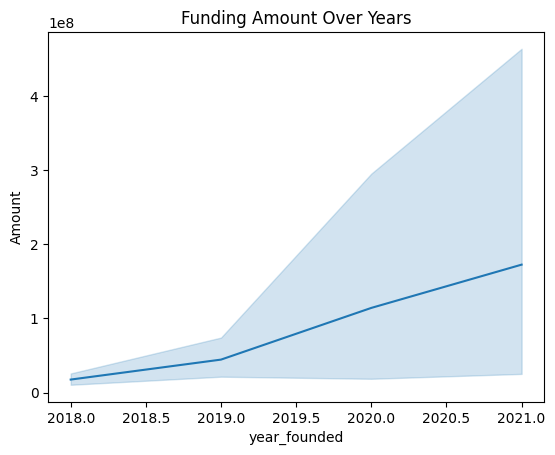

In [230]:
# Remove rows with 'undisclosed' values in the 'Amount' column
cleaned_data = merged_data[merged_data['Amount'] != 'undisclosed']

# Plot the line graph
sns.lineplot(data=cleaned_data, x='year_founded', y='Amount')
plt.title('Funding Amount Over Years')
plt.show()



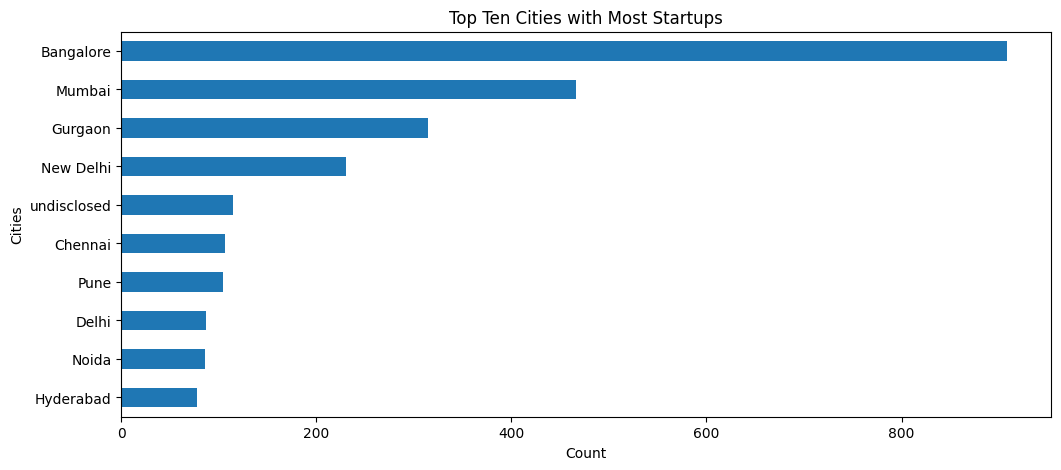

In [177]:
#count the number of startups in each city
top_ten_loc = merged_data['HeadQuarter'].value_counts().head(10).sort_values()

# plot a horinzontal bar chart to show the number of startups in each city
plt.figure(figsize=(12, 5))
top_ten_loc.plot(kind='barh')
plt.title('Top Ten Cities with Most Startups')
plt.xlabel('Count')
plt.ylabel('Cities');

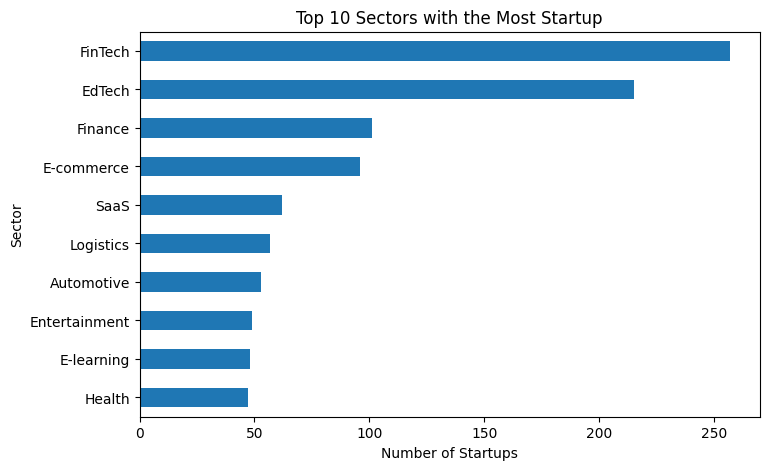

In [178]:
# check the top 10 cities with the most startups
Top_ten_sectors = merged_data['Sector'].value_counts().head(10)

# plot a bar chart to show the top 10 sectors with the most number of startups
plt.figure(figsize=(8, 5))
Top_ten_sectors.sort_values().plot(kind='barh')
plt.title('Top 10 Sectors with the Most Startup')
plt.xlabel('Number of Startups')
plt.ylabel('Sector');

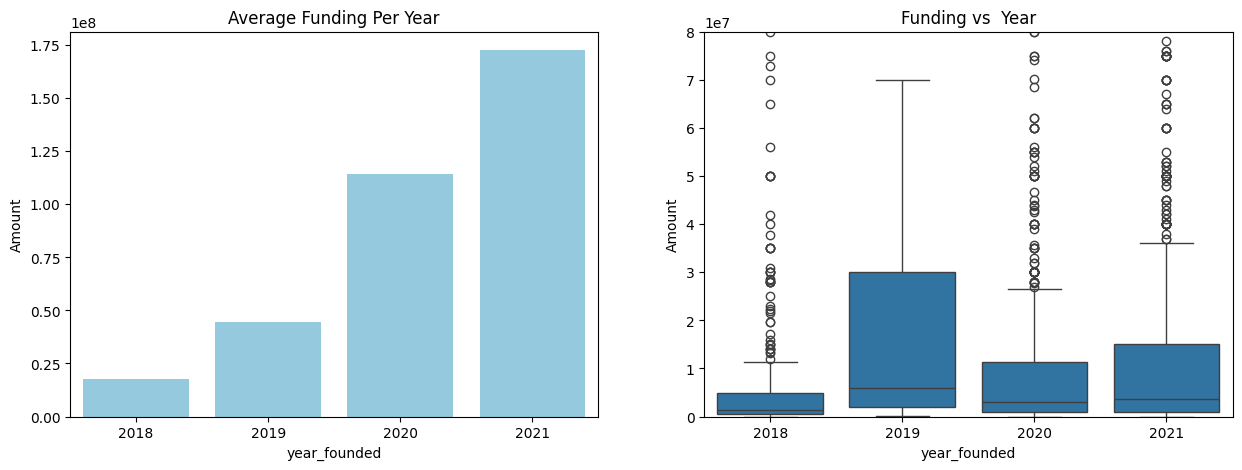

In [231]:
# get the average(mean) funding yearly
average_funding_year= merged_data.groupby(['year_founded']).agg({'Amount': 'mean'})
average_funding_year.reset_index(inplace=True)

# print the average funding yearly
# plot a bar chart to show the avearge funding yearly
plt.figure(figsize=(15,  5))
plt.subplot(1, 2, 1)
sns.barplot(
    data=average_funding_year,
    x='year_founded',
    y='Amount',
    color=neutral_color)
plt.title('Average Funding Per Year')

# plot a box plot to show the avearge funding yearly
plt.subplot(1, 2, 2)
sns.boxplot(data=merged_data, y='Amount', x='year_founded')
plt.title('Funding vs  Year');
plt.ylim(-10,80000000);

### HYPOTHESIS TESTING

**Null Hypothesis (H0):**
There is no significant difference in the average funding amounts received across different sectors within the Indian startup ecosystem from 2018 to 2021.

**Alternative Hypothesis (H1):**
There is a significant difference in the average funding amounts received across different sectors within the Indian startup ecosystem from 2018 to 2021.

### Analytical questions


1. *Analyze the growth trajectory of startups over the past four years from 2018 to 2021. Investigate if there is an increase in the number of startups being funded and the average size companies of funded annually.*

Text(0.5, 1.0, 'Size of Companies Funded In The Year 2018 - 2021')

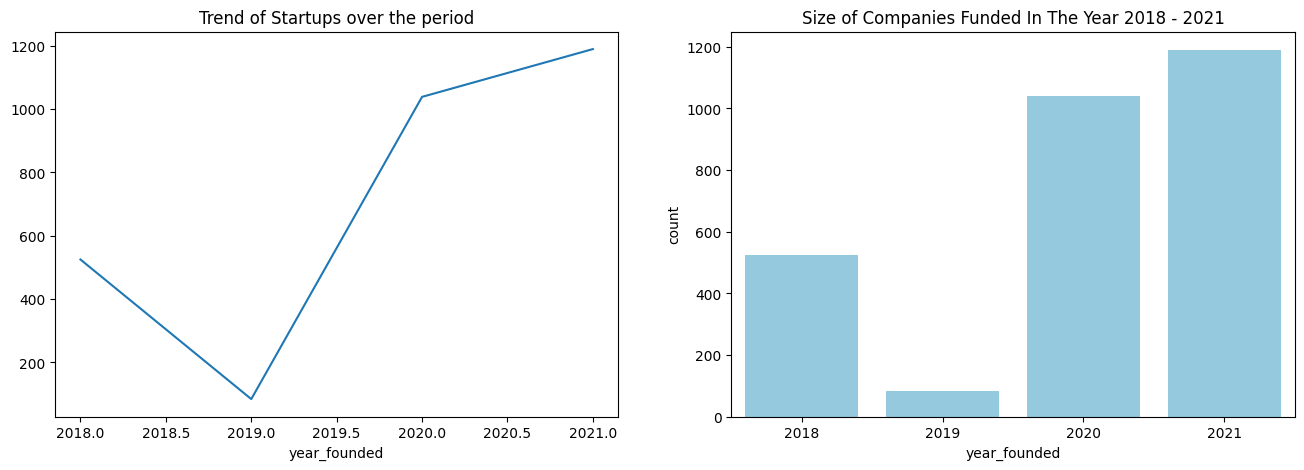

In [232]:
# plot a line gragh to show the trend of startup with the period 2018 - 2021

base_color = 'skyblue'
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
funding_year_count = merged_data.groupby(['year_founded'])['Company_Brand'].count()
funding_year_count.plot();
plt.title('Trend of Startups over the period')


# plot a bar chart to show the number of startups within each year
plt.subplot(1, 2, 2)
sns.countplot(
    x='year_founded',  
    data=merged_data, 
    color=base_color)

plt.title('Size of Companies Funded In The Year 2018 - 2021')

In [233]:
# count the number of startup in each Funding Year
merged_data['year_founded'].value_counts()

year_founded
2021    1190
2020    1039
2018     525
2019      84
Name: count, dtype: int64

### Observation


- There was a dip in the number of startups receiving funding in 2019. This could be attributed to external factors such as economic uncertainty or investor caution. In 2019, the global economy faced several challenges, including trade tensions between major economies, geopolitical uncertainties, and fluctuations in commodity prices. 
- The consistent rise in the number of startups receiving funding from 2019 onwards reflects the resilience and adaptability of India's startup ecosystem. Despite the temporary dip in funding activity in 2019, the subsequent years saw a resurgence in investor confidence and a renewed focus on supporting innovative ventures.

2. *Investigate the financial landscape for Indian startups over the four years. Has the average funding amount increased, indicating growing investor confidence, or has it plateaued or decreased overtime?* 

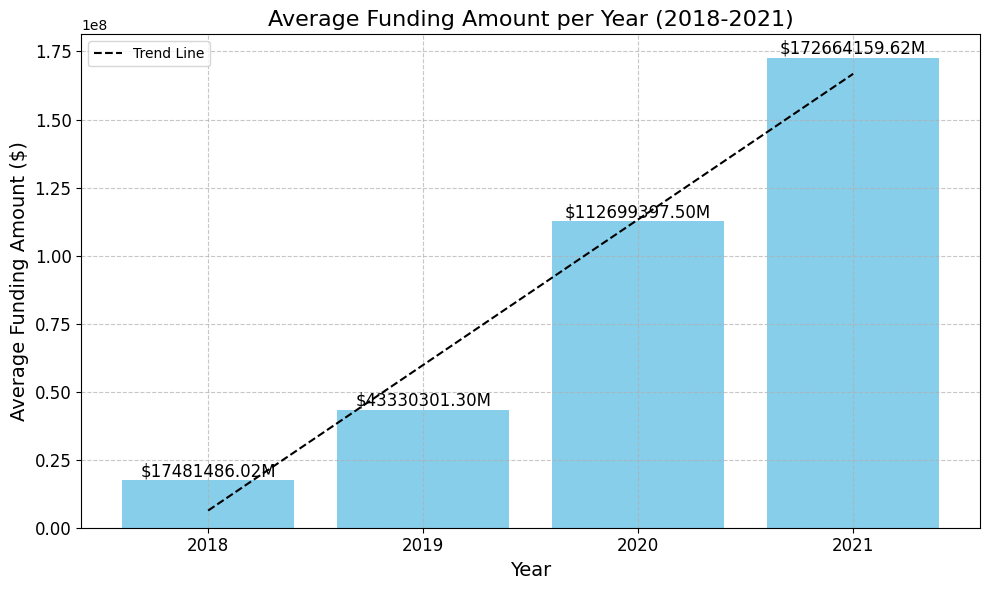

In [ ]:
from scipy.stats import linregress

# Filter data for the years 2018 to 2021
filtered_data = merged_data[(merged_data['year_founded'] >= 2018) & (merged_data['year_founded'] <= 2021)]

# Group data by year and calculate the average funding amount for each year
average_funding_per_year = filtered_data.groupby('year_founded')['Amount'].mean()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(average_funding_per_year.index, average_funding_per_year.values, color='skyblue')

# Fit a linear regression line to the data points
slope, intercept, _, _, _ = linregress(average_funding_per_year.index, average_funding_per_year.values)
trend_line = slope * average_funding_per_year.index + intercept

# Plot the trend line
plt.plot(average_funding_per_year.index, trend_line, color='black', linestyle='--', label='Trend Line')

# Add labels and title
plt.title('Average Funding Amount per Year (2018-2021)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Funding Amount ($)', fontsize=14)
plt.xticks(average_funding_per_year.index, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add values on top of each bar with a slight offset for better visibility
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, "${:.2f}M".format(height), ha='center', va='bottom', fontsize=12)

# Add legend
plt.legend()

plt.tight_layout()
plt.show()

### Observation
- Based on the linear regression analysis conducted on the average funding amount per year from 2018 to 2021, it appears that there has been a significant increase in funding over this period. The trend line fitted to the data points shows a positive slope, indicating a consistent upward trajectory in funding amounts year over year. This suggests growing investor confidence and a strengthening startup ecosystem, potentially fueled by factors such as increased interest in entrepreneurship, improved access to capital, and supportive government initiatives. The observed trend underscores the dynamism and potential of the startup landscape, positioning it as a key driver of innovation and economic growth in the region.

3. *Explore which stages of startups (e.g., Seed, Series A, Series B) are receiving the majority of investments. What are the predominant stages funded, and which cities are the identified stages of business situated.*

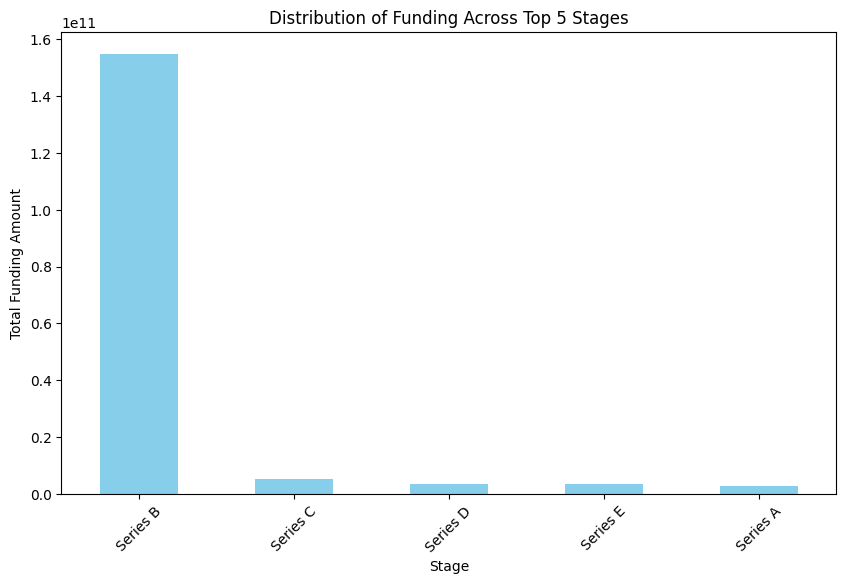

In [ ]:
# Group data by stage and calculate the sum of funding amount for each stage
stage_funding = merged_data.groupby('Stage')['Amount'].sum()

# Select the top 5 stages with the highest total funding amounts
top_5_stages = stage_funding.nlargest(5)

# Plotting
plt.figure(figsize=(10, 6))
top_5_stages.plot(kind='bar', color='skyblue')
plt.title('Distribution of Funding Across Top 5 Stages')
plt.xlabel('Stage')
plt.ylabel('Total Funding Amount')
plt.xticks(rotation=45)
plt.show()

### Observation
- Investors prioritize Series B funding in the Indian startup ecosystem due to the reduced risk and substantial growth potential associated with startups at this stage. By investing in Series B startups, investors aim to capitalize on their demonstrated market traction and scalability, maximizing returns while managing risk. This strategic approach allows investors to participate in the growth trajectory of startups poised for significant value creation, aligning with their objectives of seeking high-growth opportunities within the dynamic startup landscape.

4. *What locations within India have emerged as the primary hubs for startup activity and investment, and what factors contribute to their prominence?* 

In [235]:
# Grouping the dataset based on the headquarters
startups_by_location = merged_data.groupby('HeadQuarter')['Amount'].sum()
# Reset the index before assigning column names
top_10_locations_by_investment = startups_by_location.reset_index().sort_values(by ='Amount', ascending = False).head(10)
top_10_locations_by_investment['growth_billions'] = top_10_locations_by_investment['Amount'] / 1e9

# Assign column names
top_10_locations_by_investment.columns = ['HeadQuarter', 'Amount', 'growth_billions']
# Add a column for the rank
top_10_locations_by_investment['rank'] = top_10_locations_by_investment.reset_index().index + 1

In [239]:
# Initialize the Nominatim geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Function to retrieve coordinates for a location
def get_coordinates(location):
    try:
        location_info = geolocator.geocode(location)
        if location_info:
            return location_info.latitude, location_info.longitude
        else:
            print(f"Warning: Coordinates not found for {location}. Skipping.")
            return None, None
    except Exception as e:
        print(f"Error retrieving coordinates for {location}: {str(e)}")
        return None, None

In [240]:
# Apply the function to get coordinates for each location
top_10_locations_by_investment[['Latitude', 'Longitude']] = top_10_locations_by_investment['HeadQuarter'].apply(lambda x: pd.Series(get_coordinates(x)))
top_10_locations_by_investment

,HeadQuarter,Amount,growth_billions,rank,Latitude,Longitude
69,Mumbai,2.306610e+11,230.660963,1,19.081577,72.886628
8,Bangalore,2.415452e+10,24.154517,2,12.988157,77.622600
38,Gurgaon,6.913842e+09,6.913842,3,28.464615,77.029919
72,New Delhi,3.412121e+09,3.412121,4,28.613895,77.209006
18,California,3.078300e+09,3.078300,5,36.701463,-118.755997
83,Pune,1.395448e+09,1.395448,6,18.521428,73.854454
20,Chennai,1.123879e+09,1.123879,7,13.083694,80.270186
41,Haryana,9.066178e+08,0.906618,8,29.000000,76.000000
25,Delhi,8.264682e+08,0.826468,9,28.627393,77.171695
75,Noida,5.864570e+08,0.586457,10,28.570633,77.327215


In [246]:
# Create a map centered around the first location
map_top_10_locations_by_investment= folium.Map(location=[top_10_locations_by_investment['Latitude'].iloc[0], top_10_locations_by_investment['Longitude'].iloc[0]], zoom_start=3)
marker_cluster = MarkerCluster().add_to(map_top_10_locations_by_investment)

# Add a marker for each location to the MarkerCluster
for idx, row in top_10_locations_by_investment.iterrows():
    radius = int(row['growth_billions'] / 1e9)
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(('<strong><font color ="green">'+row['HeadQuarter']+'</font></strong><br>'+
                            '<strong>Total Investment (Billions): </strong><font color ="blue">'+str(row['growth_billions'])+'</font><br>'), max_width=250),
        icon=folium.DivIcon(html=f"<div style='font-size: 12pt; color: red;'>{row['rank']}</div>")
    ).add_to(marker_cluster)

# Display the map
map_top_10_locations_by_investment

#### Locations with the highest number of startups


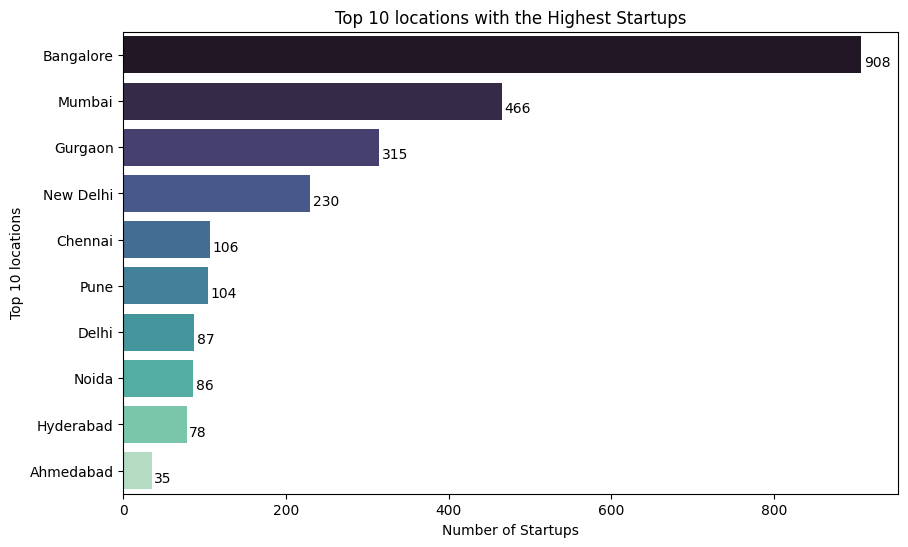

In [247]:
startups_by_location2 = merged_data['HeadQuarter'].value_counts()

# Reset index and get the top 10 locations
top_10_locations2 = startups_by_location2.head(10).sort_values(ascending=False).reset_index()
top_10_locations2.columns = ['HeadQuarter', 'count']


# Plotting using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='count', y='HeadQuarter', data=top_10_locations2, palette="mako")

# Add the numbers near the bars
for i, v in enumerate(top_10_locations2['count']):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='light')

plt.title('Top 10 locations with the Highest Startups')
plt.xlabel('Number of Startups')
plt.ylabel('Top 10 locations')
plt.show()

### Observation
- Banagalore has the highest number of startups signifying a thriving entrepreneurial ecosystem and a focal point for innovation and investment. This concentration of startups suggests various factors contributing to its appeal, such as access to talent, infrastructure, funding opportunities, and supportive government policies. Investors are likely drawn to this location due to its vibrant startup community, offering diverse investment opportunities and potential for high returns. Additionally, the clustering of startups fosters collaboration, knowledge sharing, and networking opportunities, further fueling the growth and success of ventures in the area. Overall, the prominence of this location underscores its significance as a hub for entrepreneurship and innovation, shaping the trajectory of the startup ecosystem and driving economic development in the region.

5. *What sectors have shown the highest growth in terms of funding received over the past four years?*

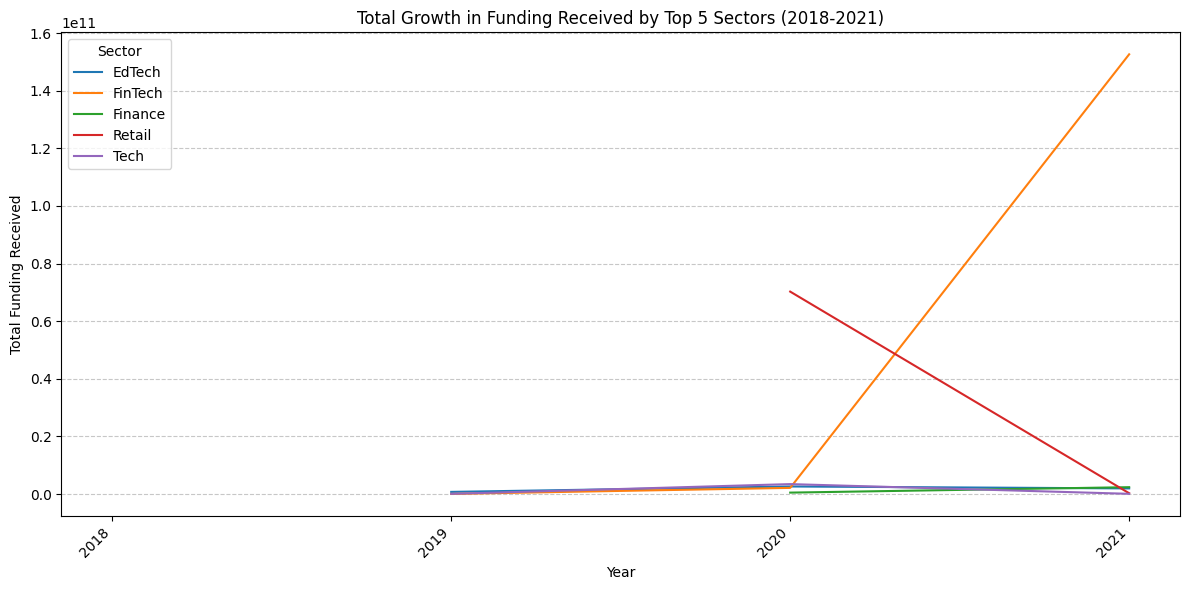

In [248]:
year_sector_2018 = merged_data[merged_data['year_founded']==2018]
year_sector_2019 = merged_data[merged_data['year_founded']==2019]
year_sector_2020 = merged_data[merged_data['year_founded']==2020]
year_sector_2021 = merged_data[merged_data['year_founded']==2021]

#visualising
data = merged_data.groupby(['Sector', 'year_founded'])['Amount'].sum().reset_index()

# Calculate total funding received by each sector
total_funding = data.groupby('Sector')['Amount'].sum()

# Get top 5 sectors by total funding
top_5_sectors = total_funding.nlargest(5).index

# Filter the grouped data for only the top 5 sectors
top_5_growth = data[data['Sector'].isin(top_5_sectors)]

# Pivot the table to have sectors as rows and years as columns
pivot_table = top_5_growth.pivot(index='year_founded', columns='Sector', values='Amount')

# Plot the total funding received for each sector over the years (line plot)
pivot_table.plot(kind='line', figsize=(12, 6))
plt.title('Total Growth in Funding Received by Top 5 Sectors (2018-2021)')
plt.xlabel('Year')
plt.ylabel('Total Funding Received')
plt.xticks(rotation=45, ha='right')
plt.xticks(np.arange(min(pivot_table.index), max(pivot_table.index)+1, 1))  # Set integer ticks for years
plt.legend(title='Sector')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Observation
- The surge in funding for fintech startups from 2020 can be attributed to a convergence of factors accelerated by the COVID-19 pandemic. The pandemic catalyzed an unprecedented digital transformation across industries, including finance, driving increased demand for innovative fintech solutions to address remote banking, contactless payments, and evolving consumer preferences. Regulatory support, coupled with market validation of fintech's resilience and relevance during crises, further bolstered investor confidence. Additionally, low interest rates, economic stimulus measures, and heightened consumer adoption of digital financial services created a conducive environment for fintech startups to attract significant funding rounds. As fintech continues to disrupt traditional financial services and drive financial inclusion, it remains a magnet for investment capital, poised for continued growth and innovation in the post-pandemic landscape.